In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
pd.set_option('max_columns', None)#to view all columns
d=pd.read_csv('bankruptcy.csv')

In [45]:
d.describe()
    

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,10503.000000,10485.000000,10460.000000,10503.000000,1.049500e+04,10489.000000,10489.000000,10503.000000,10460.000000,10460.000000,9696.000000,10503.000000,10460.000000,10276.000000,10503.000000,10489.000000,9.788000e+03,10275.000000,10503.000000,10460.000000,10460.000000,1.040200e+04,10485.000000,10489.000000,10503.000000,10503.000000,5767.000000,10503.000000,10460.000000,10485.000000,10301.000000,10460.000000,10460.000000,10460.000000,9912.000000,10485.000000,1.041700e+04,10503.000000,10460.000000,10489.000000,10503.000000,10417.000000,10275.000000,10275.000000,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,0.086764,2.411266,0.376563,0.065634,3.004332e+03,2.729654,20.511539,0.070739,-0.170778,68.448531,4.670725,0.075676,-0.176466,0.211936,0.196153,2.580730,1.185945e+03,6.092884,3.921179,0.459346,-0.177084,1.171670e+03,8.419887,5.398356,0.071075,1.981250,102.697692,0.465510,-0.076355,2.381026,28.707178,-0.141671,195.389286,126.940260,17.451297,8.978029,5.424888e+02,0.004834,-0.217844,8.686024,0.497135,11.244158,5.725829,6.708568,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,0.655407,111.459642,49.675550,0.651151,1.091981e+05,110.233475,721.812766,0.835328,11.210201,1083.699904,305.897238,0.581734,11.149274,2.093845,6.742161,108.823993,3.469123e+04,94.713753,0.840528,71.755042,11.157003,6.841270e+04,37.696764,69.035263,0.572124,2.630705,2469.447679,6.425362,8.079334,37.819839,2845.290346,10.787555,3303.309554,2766.505503,1720.342176,523.565601,3.126416e+04,0.629770,11.910935,522.528325,6.420885,851.867915,89.708042,93.511530,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,-17.692000,-1543.800000,-631.710000,-17.692000,-2.321800e+06,-204.300000,-0.043411,-17.692000,-771.650000,-0.001439,-1.107500,-17.692000,-771.650000,-60.742000,-500.750000,-204.300000,-1.901300e+05,-690.400000,-0.358530,-6351.700000,-771.390000,-9.295600e+03,-1.921900,-1696.000000,-17.073000,-0.000084,-2.200900,-479.730000,-551.110000,-7.081900,-667.730000,-765.800000,-25113.000000,-25113.000000,-74385.000000,-6.469200,-1.730300e+01,-17.692000,-905.750000,0.002080,0.000000,-25.467000,-869.040000,-706.490000,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,0.009809,0.006183,0.020740,0.002131,1.865950e+02,0.060302,1.449200,0.002131,0.001648,14.253750,0.796673,0.000000,0.000556,0.014938,0.135695,0.055067,0.000000e+00,0.027178,3.393200,0.073850,0.004012,4.471900e+01,2.785900,0.367460,0.001730,1.043500,1.038600,0.426810,0.001557,0.053666,0.022026,0.000000,65.627250,34.214750,0.006157,0.602830,1.494100e+01,-0.048988,-0.036186,0.749370,0.177200,0.122470,0.667285,0.950435,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+

missing data
a4:18 
a5: 25 
a8: 14
a9: 3
a12: 18



In [48]:
len(d)
len(d.dropna())

4885

We lose more than half the data if we blind drop rows with missing data, hence imputation is necessary

<AxesSubplot:>

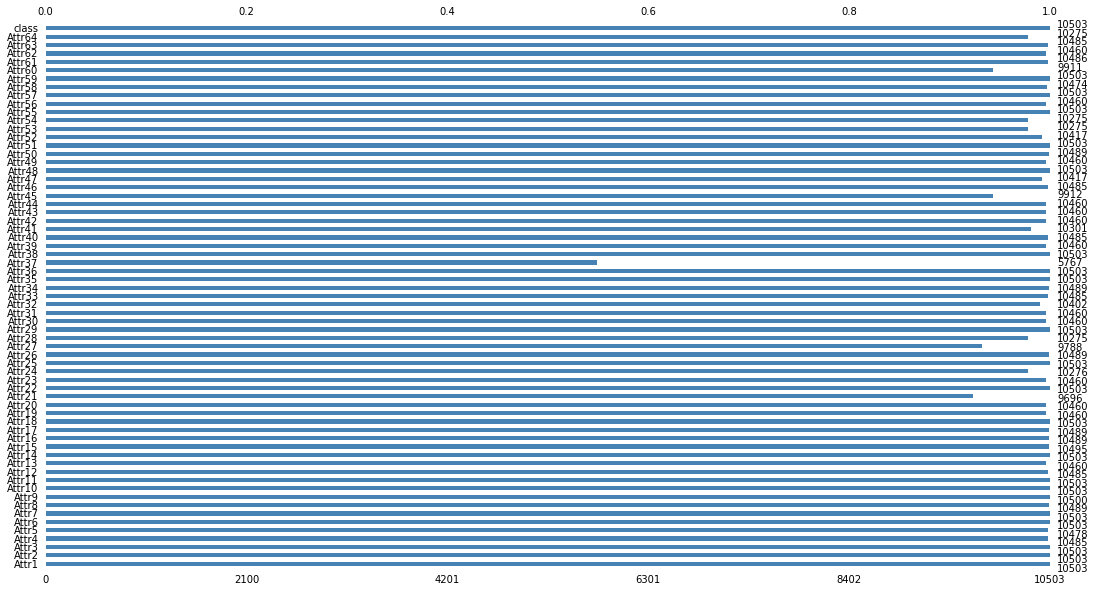

In [50]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(d, figsize=(18,10), fontsize=10, color='steelblue')

Attribute no. 37 with only 5700 values can be dropped

In [62]:
d['Attr37'].describe()
Q1=d['Attr37'].quantile(0.25)
Q3=d['Attr37'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-2*IQR
upper=Q3+2*IQR

lower,upper
d['Attr37'].describe()
d['Attr37'][d.Attr37<30.148]

3         3.96240
4         4.54900
7        11.74900
8        21.06500
11        9.78520
           ...   
10497     5.70310
10498     1.14150
10499     0.41299
10500     0.93568
10502     4.34600
Name: Attr37, Length: 4987, dtype: float64

of 5700, only 4987 lie in the range. Others are outliers
First, impute and then outlier?
* winsorize
* log transformation using numpy

### After Data Cleaning- Correlation

In [33]:
d.corr()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
Attr1,1.000000,0.268892,-0.271895,0.001285,-0.001064,-0.218187,0.998670,0.001902,-0.055770,-0.268475,...,0.012158,0.008011,0.048661,-0.016774,-0.003583,0.002481,-0.035938,0.128880,0.010188,-0.001634
Attr2,0.268892,1.000000,-0.997796,-0.001445,-0.011349,-0.986278,0.266851,-0.002495,0.005357,-0.999671,...,-0.009680,-0.001797,-0.000537,0.000636,0.000872,0.001542,0.001200,0.387945,-0.011432,0.014535
Attr3,-0.271895,-0.997796,1.000000,0.002102,0.011179,0.984754,-0.269750,0.001302,-0.004825,0.997925,...,0.010433,0.001387,0.000413,-0.000272,-0.000569,0.006461,-0.002905,-0.387685,0.014322,0.036611
Attr4,0.001285,-0.001445,0.002102,1.000000,0.001301,-0.000040,0.001164,0.729970,-0.002861,0.001478,...,-0.000513,0.000504,0.000051,-0.002100,-0.000564,0.004891,-0.000548,-0.000348,0.020293,-0.000008
Attr5,-0.001064,-0.011349,0.011179,0.001301,1.000000,0.010715,-0.000910,0.001331,-0.000431,0.011354,...,0.001235,-0.000195,0.000003,0.000101,0.000130,0.000192,-0.000430,-0.005584,0.002411,0.000738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Attr60,0.002481,0.001542,0.006461,0.004891,0.000192,0.000109,0.001899,0.000219,0.019988,-0.001147,...,-0.001339,0.000147,-0.002020,-0.000149,0.003794,1.000000,-0.001416,-0.000769,0.001666,0.006715
Attr61,-0.035938,0.001200,-0.002905,-0.000548,-0.000430,-0.001199,-0.036171,0.000270,0.059324,-0.001165,...,-0.008466,0.001824,0.002047,-0.002563,-0.001735,-0.001416,1.000000,-0.000271,0.070326,-0.000515
Attr62,0.128880,0.387945,-0.387685,-0.000348,-0.005584,-0.382994,0.126973,-0.000107,-0.000363,-0.387883,...,-0.000779,-0.105301,-0.000510,0.059798,0.000448,-0.000769,-0.000271,1.000000,-0.001068,0.000313
Attr63,0.010188,-0.011432,0.014322,0.020293,0.002411,0.004500,0.012379,0.076768,0.603221,0.011374,...,0.004683,0.003272,0.002849,-0.004328,-0.005251,0.001666,0.070326,-0.001068,1.000000,0.016123


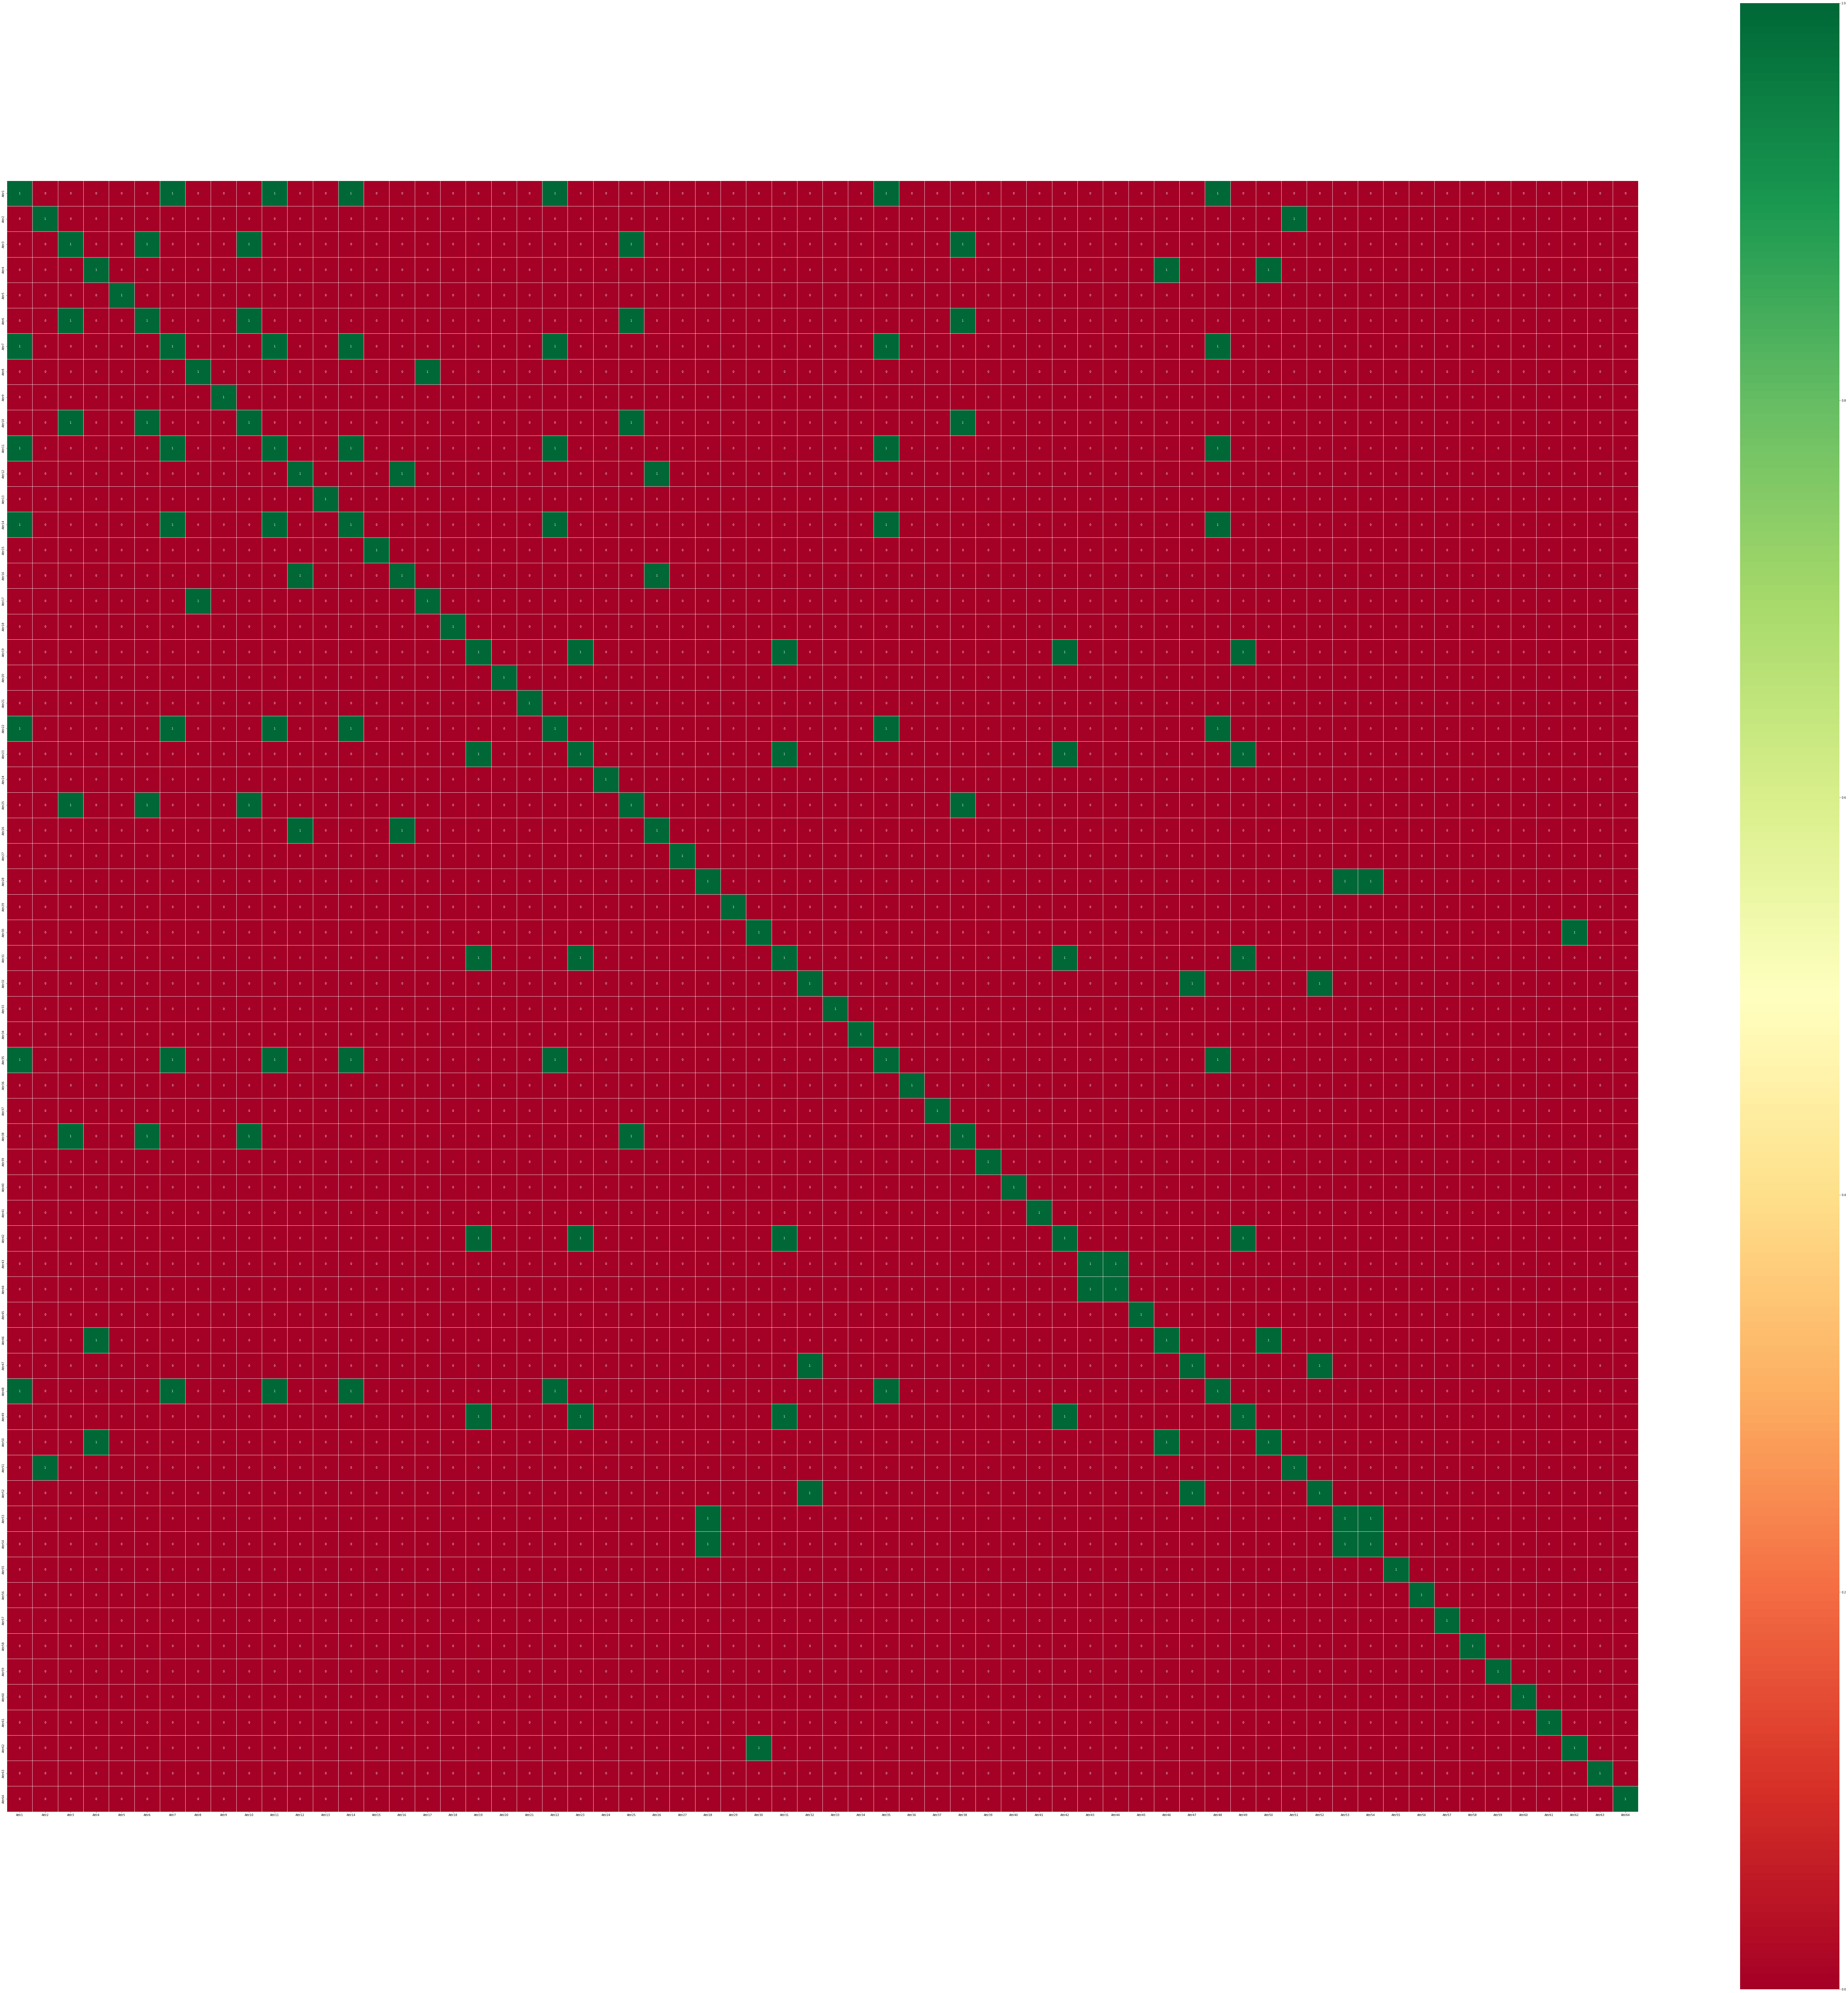

In [64]:
fig, ax = plt.subplots(figsize=(128,128))
sns.heatmap(d.corr() >0.85, square=True, linewidths=1, annot=True, cmap=plt.cm.RdYlGn, ax=ax);